# Final Project

In [281]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', 100)
%matplotlib inline

## Read the data

In [282]:
df = pd.read_csv("train.csv")

# let's divide the dataframe into features and target
X = df.drop("Price", axis=1)
y = df["Price"]

# let's split the training sample into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)
print(f"X_train = {X_train.shape} X_valid = {X_valid.shape}\ny_train = {y_train.shape} y_valid = {y_valid.shape}")

df.head(2)

X_train = (7500, 19) X_valid = (2500, 19)
y_train = (7500,) y_valid = (2500,)


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.08904,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.00007,B,B,46,10309,1,240.0,1,16,B,300009.450063


In [283]:
#will also read the test sample
X_test = pd.read_csv("test.csv")
X_test.head(2)
idx_test = X_test["Id"]

## EDA

In [284]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 4901 to 7270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             7500 non-null   int64  
 1   DistrictId     7500 non-null   int64  
 2   Rooms          7500 non-null   float64
 3   Square         7500 non-null   float64
 4   LifeSquare     5906 non-null   float64
 5   KitchenSquare  7500 non-null   float64
 6   Floor          7500 non-null   int64  
 7   HouseFloor     7500 non-null   float64
 8   HouseYear      7500 non-null   int64  
 9   Ecology_1      7500 non-null   float64
 10  Ecology_2      7500 non-null   object 
 11  Ecology_3      7500 non-null   object 
 12  Social_1       7500 non-null   int64  
 13  Social_2       7500 non-null   int64  
 14  Social_3       7500 non-null   int64  
 15  Healthcare_1   3886 non-null   float64
 16  Helthcare_2    7500 non-null   int64  
 17  Shops_1        7500 non-null   int64  
 18  Shops

In [285]:
#let's check how many passes
X_train.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1594
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     3614
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [286]:
X_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,7500.000000,7500.000000,7500.000000,7500.000000,5906.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,3886.000000,7500.000000,7500.000000
mean,8368.529067,50.441733,1.887600,56.262165,37.438158,6.417333,8.502800,12.634400,4.658736e+03,0.117437,24.736133,5361.467467,8.027733,1129.527535,1.309467,4.259200
std,4858.185603,43.700617,0.840234,20.337193,98.726068,32.870226,5.236619,6.833644,2.315178e+05,0.118195,17.627507,4021.616228,23.825236,1015.975294,1.488576,4.819673
min,0.000000,0.000000,0.000000,2.377248,0.370619,0.000000,1.000000,0.000000,1.912000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,4165.750000,19.000000,1.000000,41.748189,22.838608,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,325.000000,0.000000,1.000000
50%,8378.500000,35.000000,2.000000,52.539538,32.837997,6.000000,7.000000,14.000000,1.977000e+03,0.072158,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000
75%,12540.250000,75.000000,2.000000,65.980391,45.069982,9.000000,12.000000,17.000000,2.001000e+03,0.194489,36.000000,7287.000000,5.000000,1547.750000,2.000000,6.000000
max,16796.000000,209.000000,19.000000,604.705972,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


# `Numeric data`

In [287]:
def print_max_min_q95_q05(data, feature):
    """let's compare the emissions with quantiles 0.95 and 0.05"""
    print(f"max = {data[feature].max()}, quantile(0.95) = {data[feature].quantile(0.95)}") 
    print(f"min = {data[feature].min()}, quantile(0.05) = {data[feature].quantile(0.05)}")

def trim_column(data, feature):
    """replaces the top and bottom of a small part of the data"""
    data.loc[data[feature] > data[feature].quantile(0.95), feature] = data[feature].median()
    data.loc[data[feature] < data[feature].quantile(0.05), feature] = data[feature].median()


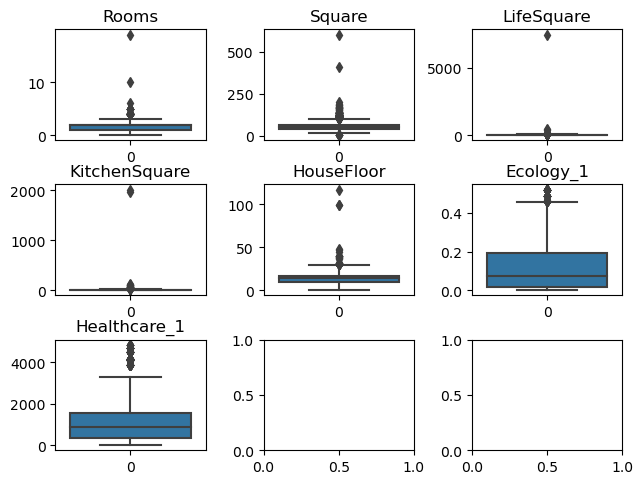

In [288]:
# let's look at the spread of data
data_float = X_train.select_dtypes("float64")
data_float_cln = data_float.columns
fig, ax = plt.subplots(3, 3)
ax = ax.flatten()
fig.tight_layout()
data_float = data_float.reset_index(drop=True)
for ind, feature in enumerate(data_float_cln):
    data_f = data_float[feature].dropna()
    data_f = data_f.reset_index(drop=True)
    sns.boxplot(data_f, ax=ax[ind])
    ax[ind].title.set_text(feature)

## Rooms

In [289]:
print_max_min_q95_q05(X_train, "Rooms")
#there are no zero rooms, but 19 is quite possible
X_train.loc[X_train["Rooms"] < X_train["Rooms"].quantile(0.05), "Rooms"] = X_train["Rooms"].median()
# trim_column(X_train, "Rooms")

max = 19.0, quantile(0.95) = 3.0
min = 0.0, quantile(0.05) = 1.0


## LifeSquare

<Axes: xlabel='LifeSquare', ylabel='Count'>

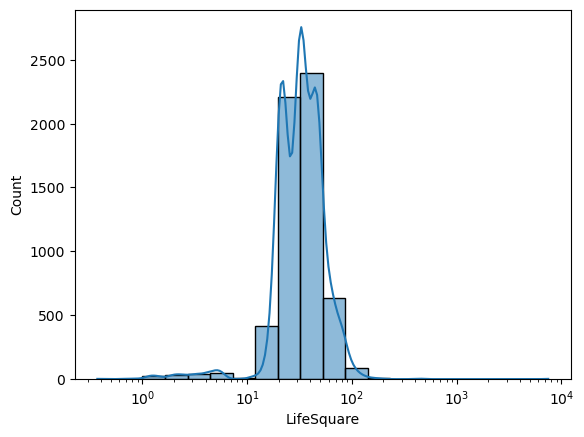

In [290]:
# plt.figure(figsize=(16, 9))
sns.histplot(data=X_train["LifeSquare"],log_scale=True, kde=True, bins=20)
#it can be seen that there is not a small block of apartments with more than 1000 square meters

In [291]:
# replace the gaps with the difference between the total area and the kitchen area, if it turned out to be a negative value, then take the median
life_square = X_train["Square"] - X_train["KitchenSquare"]
life_square_mean = X_train["LifeSquare"].mean()
life_square[life_square <=0] = life_square_mean
X_train.loc[X_train["LifeSquare"].isna(), "LifeSquare"] = life_square

In [292]:
print_max_min_q95_q05(X_train, "LifeSquare")
trim_column(X_train, "LifeSquare")

max = 7480.592128925202, quantile(0.95) = 79.64843322848336
min = 0.3706194194766937, quantile(0.05) = 18.55624141869799


## Healthcare_1

In [293]:
# there are too many gaps so you will have to delete this column
X_train = X_train.drop("Healthcare_1", axis=1)
X_train.head(2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
4901,13295,1,1.0,39.24880,39.248800,0.0,9,17.0,1977,0.007122,B,B,1,264,0,0,1,B
4375,3756,61,2.0,56.05358,33.929772,8.0,8,12.0,1986,0.300323,B,B,52,10311,6,1,9,B


In [294]:
# there are no passes left
X_train.isna().sum().sum()

0

## KitchenSquare

In [295]:
print_max_min_q95_q05(X_train, "KitchenSquare")
#we see a very large gap of the maximum. The minimum is quite possible, while we leave
X_train.loc[X_train["KitchenSquare"] > X_train["KitchenSquare"].quantile(0.95), "KitchenSquare"] = X_train["KitchenSquare"].median()

max = 2014.0, quantile(0.95) = 12.0
min = 0.0, quantile(0.05) = 0.0


## Square

In [296]:
#we do the same thing
print_max_min_q95_q05(X_train, "Square")
trim_column(X_train, "Square")

max = 604.7059719500998, quantile(0.95) = 87.64357799767895
min = 2.377247587180074, quantile(0.05) = 34.126332205839404


## Floor and HouseFloor

In [297]:
print_max_min_q95_q05(X_train, "HouseFloor")
trim_column(X_train, "HouseFloor")

max = 117.0, quantile(0.95) = 24.0
min = 0.0, quantile(0.05) = 1.0


In [298]:
# let's see if there are apartments whose floor is more than the number of floors in the house
(X_train["Floor"] > X_train["HouseFloor"]).sum() 

1353

In [299]:
# replace it with the median floor
X_train.loc[X_train["Floor"] > X_train["HouseFloor"], "Floor"] = X_train["Floor"].median()

## HouseYear

In [300]:
#if the housing is from the future, then we will replace its age with a mode
print_max_min_q95_q05(X_train, "HouseYear")
X_train.loc[X_train["HouseYear"] > 2020, "HouseYear"] = X_train["HouseYear"].mode().values[0]

max = 20052011, quantile(0.95) = 2017.0
min = 1912, quantile(0.05) = 1962.0


# `Категориальные данные`

## Ecology_2

In [301]:
X_train["Ecology_2"].unique()

array(['B', 'A'], dtype=object)

(array([9.90666667, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.09333333]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

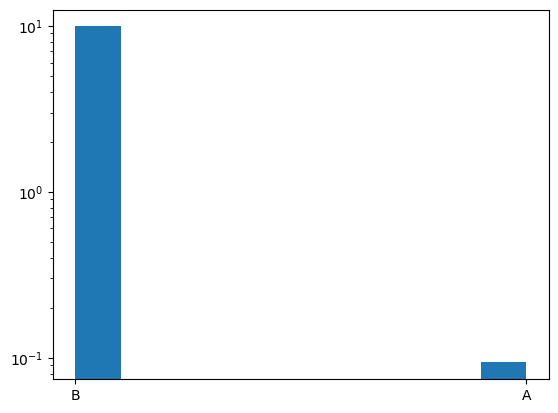

In [302]:
plt.hist(X_train["Ecology_2"], density=True, log=True)
# we see that class b is much more popular

In [303]:
X_train = pd.get_dummies(data=X_train, columns=["Ecology_2"])
X_train.head(2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Ecology_2_A,Ecology_2_B
4901,13295,1,1.0,39.24880,39.248800,0.0,9,17.0,1977,0.007122,B,1,264,0,0,1,B,0,1
4375,3756,61,2.0,56.05358,33.929772,8.0,8,12.0,1986,0.300323,B,52,10311,6,1,9,B,0,1


## Ecology_3

In [304]:
X_train["Ecology_3"].unique()

array(['B', 'A'], dtype=object)

(array([9.71866667, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.28133333]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

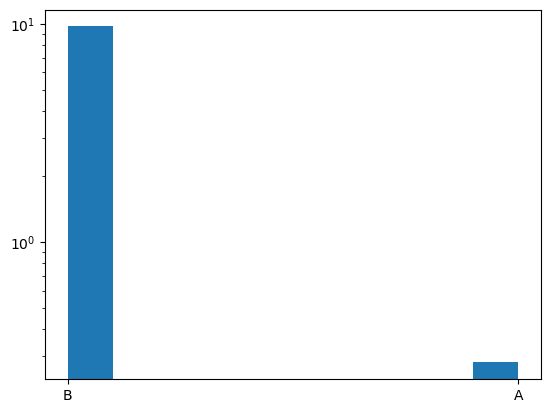

In [305]:
plt.hist(X_train["Ecology_3"], density=True, log=True)

In [306]:
X_train = pd.get_dummies(data=X_train, columns=["Ecology_3"])
X_train.head(2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B
4901,13295,1,1.0,39.24880,39.248800,0.0,9,17.0,1977,0.007122,1,264,0,0,1,B,0,1,0,1
4375,3756,61,2.0,56.05358,33.929772,8.0,8,12.0,1986,0.300323,52,10311,6,1,9,B,0,1,0,1


## Shops_2

In [307]:
X_train["Shops_2"].unique()

array(['B', 'A'], dtype=object)

(array([9.16933333, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.83066667]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

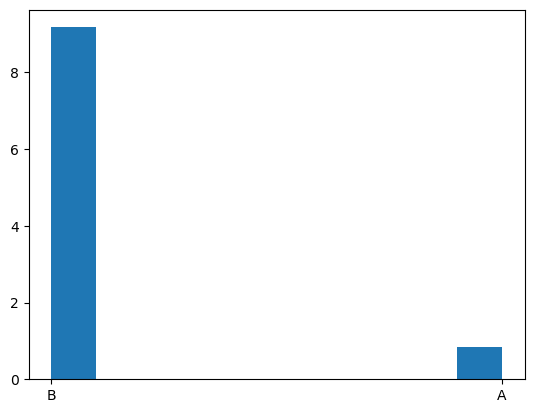

In [308]:
plt.hist(X_train["Shops_2"], density=True)

In [309]:
X_train = pd.get_dummies(data=X_train, columns=["Shops_2"])
X_train.head(2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
4901,13295,1,1.0,39.24880,39.248800,0.0,9,17.0,1977,0.007122,1,264,0,0,1,0,1,0,1,0,1
4375,3756,61,2.0,56.05358,33.929772,8.0,8,12.0,1986,0.300323,52,10311,6,1,9,0,1,0,1,0,1


## Матрица карриляции

<Axes: >

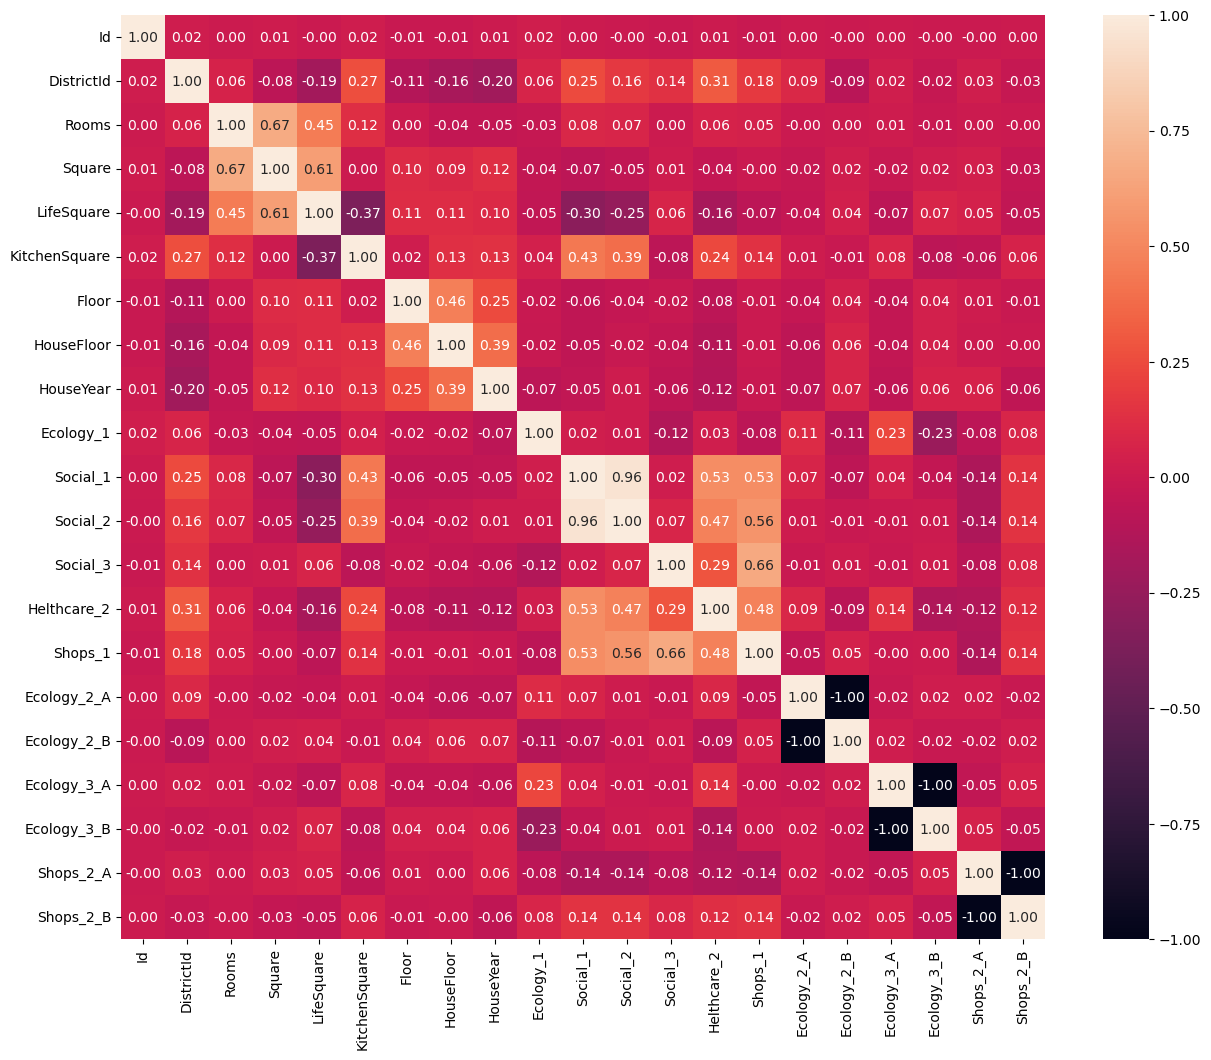

In [310]:
X_train_corr = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
sns.heatmap(X_train_corr, annot=True, square=True, fmt=".2f", ax=ax)
#it can be seen that Social_1 and Social_2 strongly correlate, but the model behaved worse without Social_2

## Добавляем признаки

In [311]:
X_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,8368.529067,50.441733,1.888933,54.588145,39.293987,5.474000,7.542133,12.432267,1984.999200,0.117437,24.736133,5361.467467,8.027733,1.309467,4.259200,0.009333,0.990667,0.028133,0.971867,0.083067,0.916933
std,4858.185603,43.700617,0.838823,13.489466,14.306549,3.619485,4.102398,5.549719,18.359532,0.118195,17.627507,4021.616228,23.825236,1.488576,4.819673,0.096164,0.096164,0.165365,0.165365,0.276001,0.276001
min,0.000000,0.000000,1.000000,34.127059,18.556785,0.000000,1.000000,1.000000,1912.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4165.750000,19.000000,1.000000,43.100481,29.398721,1.000000,5.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,8378.500000,35.000000,2.000000,52.539495,37.016579,6.000000,7.000000,14.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,12540.250000,75.000000,2.000000,63.512029,47.016555,8.000000,9.000000,17.000000,2001.000000,0.194489,36.000000,7287.000000,5.000000,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,16796.000000,209.000000,19.000000,87.639998,79.647279,12.000000,24.000000,24.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


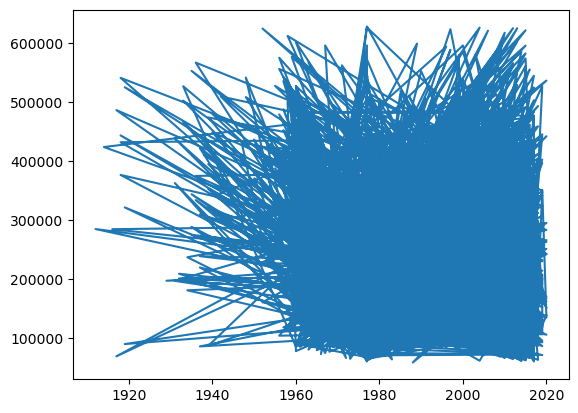

In [312]:
plt.plot(X_train["HouseYear"], y_train)

In [313]:
# we will divide the houses into categories by age
X_train["youth_home"] = pd.cut(df["HouseYear"], 
[0, X_train["HouseYear"].quantile(0.25), 
    X_train["HouseYear"].quantile(0.5), 
    X_train["HouseYear"].quantile(0.75), 
    np.inf],
labels=[4, 3, 2, 1])

In [314]:
#let's add the category big_house. 
#Housing is big if its area is larger than the median and the number of rooms is also larger than the median
X_train["big_house"] = 0
X_train.loc[(X_train["Square"]>X_train["Square"].quantile(0.5)) & (X_train["Rooms"]>X_train["Rooms"].quantile(0.5)),"big_house"] = 1

## Let's create a class for data preparation

In [315]:
class DataPreprocessing:
    """Подготовка исходных данных"""
    def __init__(self):
        self.life_square_median = None
        self.life_square = None
        self.kitchen_square_median = None
        self.kitchen_square_q95 = None
        #................
    def fit(self, X):
        self.life_square_median = X["LifeSquare"].median()
        self.kitchen_square_median = X["KitchenSquare"].median()
        self.kitchen_square_q95 = X["KitchenSquare"].quantile(0.95)
        self.floor_median = X["Floor"].median()
        self.house_year_mode = X["HouseYear"].mode().values[0]
    def transform(self, X):
        #Rooms
        X.loc[X["Rooms"] < X["Rooms"].quantile(0.05), "Rooms"] = X["Rooms"].median()
        
        #LifeSquare
        life_square = X["Square"] - X["KitchenSquare"]
        life_square[life_square <=0] = self.life_square_median
        X.loc[X["LifeSquare"].isna(), "LifeSquare"] = life_square
        self.trim_column(X, "LifeSquare")
        
        #Healthcare_1
        X = X.drop("Healthcare_1", axis=1)
        
        #KitchenSquare
        X.loc[X["KitchenSquare"] > self.kitchen_square_q95, "KitchenSquare"] = self.kitchen_square_median
    
        #Square
        trim_column(X, "Square")
        
        #Floor and HouseFloor
        trim_column(X, "HouseFloor")
        X.loc[X["Floor"] > X["HouseFloor"], "Floor"] = self.floor_median
        
        #HouseYear
        X.loc[X["HouseYear"] > 2020, "HouseYear"] = self.house_year_mode
        
        #Ecology_2
        X = pd.get_dummies(data=X, columns=["Ecology_2"])
        
        #Ecology_3
        X = pd.get_dummies(data=X, columns=["Ecology_3"])
        
        #Shops_2
        X = pd.get_dummies(data=X, columns=["Shops_2"])
        
        #youth_home
        X["youth_home"] = pd.cut(df["HouseYear"], 
        [0, X["HouseYear"].quantile(0.25), 
        X["HouseYear"].quantile(0.5), 
        X["HouseYear"].quantile(0.75), 
        np.inf],
        labels=[4, 3, 2, 1])
        
        #big_house
        X["big_house"] = 0
        X.loc[(X["Square"]>X["Square"].quantile(0.5)) & (X["Rooms"]>X["Rooms"].quantile(0.5)),"big_house"] = 1
        
        return X        
    def print_max_min_q95_q05(self, data, feature):
        print(f"max = {data[feature].max()}, quantile(0.95) = {data[feature].quantile(0.95)}") 
        print(f"min = {data[feature].min()}, quantile(0.05) = {data[feature].quantile(0.05)}")
    def trim_column(self, data, feature):
        data.loc[data[feature] > data[feature].quantile(0.95), feature] = data[feature].median()
        data.loc[data[feature] < data[feature].quantile(0.05), feature] = data[feature].median()

#let's repeat all the actions with the X_valid
data_pred = DataPreprocessing()
data_pred.fit(X_train)
X_valid = data_pred.transform(X_valid)
X_valid.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,big_house
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.00000,2500.000000,2500.000000,2500.000000
mean,8428.043600,50.278000,1.901600,54.501307,39.131669,5.269600,7.621200,12.310800,1984.457600,0.123119,24.539600,5324.227200,8.073600,1.349600,4.147600,0.010800,0.989200,0.02560,0.97440,0.080800,0.919200,0.237600
std,4862.217398,43.255209,0.834863,13.543855,14.215736,3.361523,4.184724,5.522319,18.558264,0.121407,17.247453,3962.685449,23.856518,1.508473,4.766099,0.103381,0.103381,0.15797,0.15797,0.272582,0.272582,0.425698
min,2.000000,0.000000,1.000000,34.198210,18.211013,0.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
25%,4186.500000,21.000000,1.000000,43.036312,29.429517,1.000000,5.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.00000,0.000000,1.000000,0.000000
50%,8447.000000,37.000000,2.000000,52.323288,37.120542,6.000000,7.000000,12.000000,1977.000000,0.075779,25.000000,5261.000000,2.000000,1.000000,3.000000,0.000000,1.000000,0.00000,1.00000,0.000000,1.000000,0.000000
75%,12762.500000,74.000000,2.000000,63.133314,46.847873,8.000000,10.000000,17.000000,2001.000000,0.200147,35.000000,7077.000000,5.000000,3.000000,5.000000,0.000000,1.000000,0.00000,1.00000,0.000000,1.000000,0.000000
max,16798.000000,208.000000,10.000000,87.963266,80.867163,10.000000,24.000000,24.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000


## Standardizing data

In [316]:

scaler = StandardScaler()
#let's choose only float features
X_train_float = X_train.select_dtypes("float64")
X_valid_float = X_valid.select_dtypes("float64")
columns_float = X_train_float.columns

X_train_float_standard = scaler.fit_transform(X_train_float)
X_valid_float_standard = scaler.transform(X_valid_float)

X_train_standard = X_train
X_valid_standard = X_valid

X_train_standard[columns_float] = X_train_float_standard
X_valid_standard[columns_float] = X_valid_float_standard

## Preparing the model

In [317]:
# tests of different models

# lr = LinearRegression()
# lr.fit(X_train_standard, y_train)
# y_pred_standard = lr.predict(X_valid_standard)

# print(f"lr = {r2(y_valid, y_pred_standard)}")
# lr = 0.4581958245301119

# tree = DecisionTreeRegressor(max_depth=10, random_state=42)
# tree.fit(X_train_standard, y_train)
# y_pred_tree = tree.predict(X_valid_standard)

# print(f"tree = {r2(y_valid, y_pred_tree)}")
# tree = 0.5741168381657109

# rand_forest = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
# rand_forest.fit(X_train_standard, y_train)
# y_pred_forest = rand_forest.predict(X_valid_standard)

# print(f"rand_forest = {r2(y_valid, y_pred_forest)}")
# rand_forest = 0.6804210637388497

In [318]:
# %%time

# selection of parameters for the model

# grid_param = {
#     "n_estimators": [100, 200, 300, 500, 700, 1000],
#     "max_depth": [5, 10, 15, 20, 25, 30]
# }
# grid_sr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid_param, scoring="r2", cv=5, n_jobs=-1)
# grid_sr.fit(X_train_standard, y_train)

In [319]:
# the best parameters
# grid_sr.best_params_, grid_sr.best_score_
# ({'max_depth': 50, 'n_estimators': 200}, 0.7062182632137125)

In [320]:
rand_forest = RandomForestRegressor(n_estimators=200, max_depth=50, random_state=42)
rand_forest.fit(X_train_standard, y_train)
y_pred_forest = rand_forest.predict(X_valid_standard)
print(f"rand_forest = {r2(y_valid, y_pred_forest)}")

rand_forest = 0.6909057907526615


Text(0, 0.5, 'features')

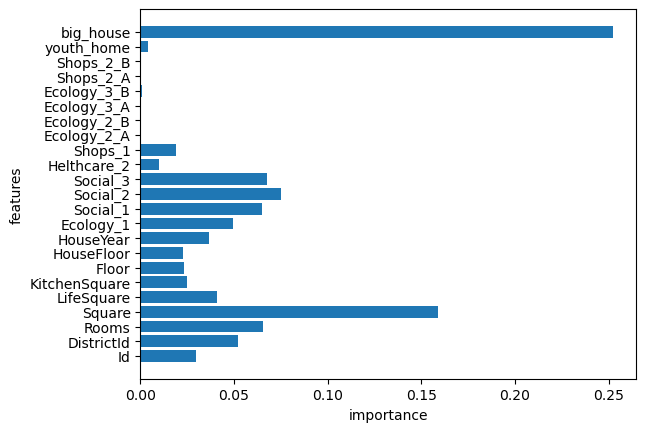

In [321]:
plt.barh(X_train_standard.columns, rand_forest.feature_importances_)
plt.xlabel("importance")
plt.ylabel("features")
#we see that the attribute we added has the greatest weight in the model

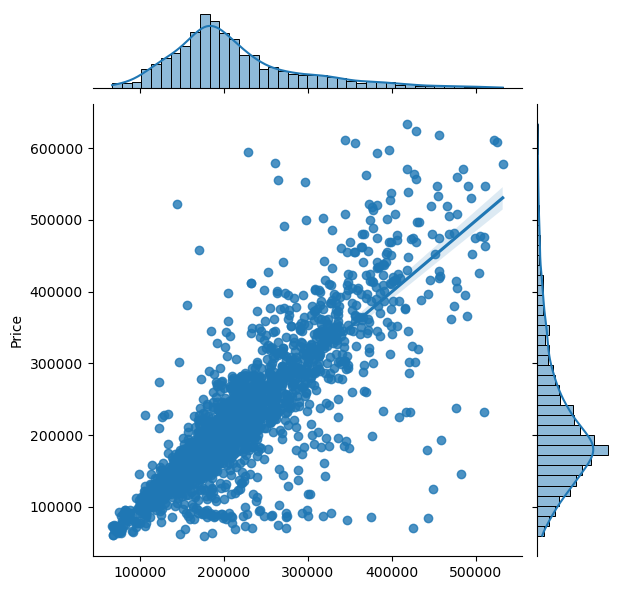

In [322]:
sns.jointplot(x=y_pred_forest, y=y_valid, kind="reg")

## loading the result

In [323]:
#let's adjust the test data for the model
X_test = data_pred.transform(X_test)

X_test_float = X_test.select_dtypes("float64")
columns_float = X_test_float.columns

X_test_float_standard = scaler.transform(X_test_float)

X_test_standard = X_test

X_test_standard[columns_float] = X_test_float_standard

In [324]:
y_pred_test = rand_forest.predict(X_test_standard)

result = pd.DataFrame({"Id": idx_test, "Price": y_pred_test})
result.to_csv("./predictions.csv", index=False)